# Username Linguistics Analysis 🎮

**Analyzing character patterns, n-grams, and linguistic features in gaming usernames**

This notebook explores the textual and linguistic patterns in player usernames to uncover insights about gaming culture, naming conventions, and linguistic trends.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import Counter
import string
import re

# Setup
plt.style.use('default')
sns.set_palette('husl')
%matplotlib inline

# Paths
DATA_DIR = Path('../data')
RAW_DIR = DATA_DIR / 'raw'
PLOTS_DIR = Path('../plots')
PLOTS_DIR.mkdir(exist_ok=True)

print("✓ Setup complete!")

✓ Setup complete!


## 1. Load Usernames

In [2]:
# Load usernames
with open(RAW_DIR / 'usernames.txt', 'r', encoding='utf-8') as f:
    usernames = [line.strip() for line in f if line.strip()]

print(f"Total unique usernames: {len(usernames):,}")
print(f"\nSample usernames (first 10):")
for i, name in enumerate(usernames[:10], 1):
    print(f"  {i:2}. {name}")

Total unique usernames: 5,026

Sample usernames (first 10):
   1. 0
   2. 000O0
   3. 00jd
   4. 03RIP
   5. 05hnon_light
   6. 06Killer_
   7. 0CCIS0R
   8. 0LtJ
   9. 0Sinner
  10. 0btey_


## 2. Basic Statistics

In [3]:
# Length statistics
lengths = [len(name) for name in usernames]

print("USERNAME LENGTH STATISTICS")
print("="*50)
print(f"Mean length:   {np.mean(lengths):.2f} characters")
print(f"Median length: {np.median(lengths):.0f} characters")
print(f"Min length:    {min(lengths)} characters")
print(f"Max length:    {max(lengths)} characters")
print(f"Std dev:       {np.std(lengths):.2f} characters")

USERNAME LENGTH STATISTICS
Mean length:   8.31 characters
Median length: 8 characters
Min length:    1 characters
Max length:    16 characters
Std dev:       3.04 characters


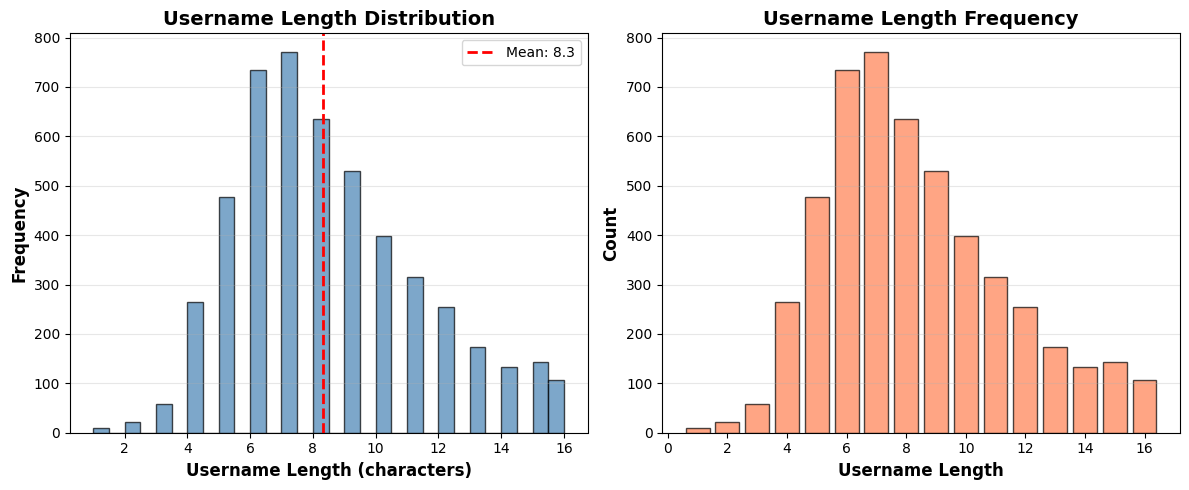

✓ Plot saved to plots/username_length_distribution.png


In [4]:
# Length distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(lengths, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(lengths), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(lengths):.1f}')
plt.xlabel('Username Length (characters)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Username Length Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
length_counts = Counter(lengths)
sorted_lengths = sorted(length_counts.items())
x_vals = [x[0] for x in sorted_lengths]
y_vals = [x[1] for x in sorted_lengths]
plt.bar(x_vals, y_vals, color='coral', edgecolor='black', alpha=0.7)
plt.xlabel('Username Length', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Username Length Frequency', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(PLOTS_DIR / 'username_length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Plot saved to plots/username_length_distribution.png")

## 3. Character Frequency Analysis

In [5]:
# Combine all characters
all_chars = ''.join(usernames)

# Count character frequencies
char_counts = Counter(all_chars)

# Separate into categories
letters = {k: v for k, v in char_counts.items() if k.isalpha()}
digits = {k: v for k, v in char_counts.items() if k.isdigit()}
special = {k: v for k, v in char_counts.items() if not k.isalnum()}

print("CHARACTER TYPE BREAKDOWN")
print("="*50)
print(f"Total characters: {len(all_chars):,}")
print(f"Letters:  {sum(letters.values()):,} ({sum(letters.values())/len(all_chars)*100:.1f}%)")
print(f"Digits:   {sum(digits.values()):,} ({sum(digits.values())/len(all_chars)*100:.1f}%)")
print(f"Special:  {sum(special.values()):,} ({sum(special.values())/len(all_chars)*100:.1f}%)")
print(f"\nMost common special characters:")
for char, count in sorted(special.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"  '{char}': {count:,} times")

CHARACTER TYPE BREAKDOWN
Total characters: 41,786
Letters:  38,632 (92.5%)
Digits:   2,279 (5.5%)
Special:  875 (2.1%)

Most common special characters:
  '_': 875 times


In [6]:
# Letter frequency (case-insensitive)
letters_lower = {}
for char, count in letters.items():
    char_lower = char.lower()
    letters_lower[char_lower] = letters_lower.get(char_lower, 0) + count

# English letter frequency (for comparison)
english_freq = {
    'a': 8.2, 'b': 1.5, 'c': 2.8, 'd': 4.3, 'e': 13.0, 'f': 2.2, 'g': 2.0,
    'h': 6.1, 'i': 7.0, 'j': 0.15, 'k': 0.77, 'l': 4.0, 'm': 2.4, 'n': 6.7,
    'o': 7.5, 'p': 1.9, 'q': 0.095, 'r': 6.0, 's': 6.3, 't': 9.1, 'u': 2.8,
    'v': 0.98, 'w': 2.4, 'x': 0.15, 'y': 2.0, 'z': 0.074
}

# Calculate username letter percentages
total_letters = sum(letters_lower.values())
username_freq = {k: (v / total_letters * 100) for k, v in letters_lower.items()}

# Create comparison dataframe
all_letters = sorted(set(list(username_freq.keys()) + list(english_freq.keys())))
freq_comparison = pd.DataFrame({
    'letter': all_letters,
    'username_freq': [username_freq.get(l, 0) for l in all_letters],
    'english_freq': [english_freq.get(l, 0) for l in all_letters]
})

print("\nLETTER FREQUENCY COMPARISON (Top 10)")
print("="*50)
top_letters = freq_comparison.nlargest(10, 'username_freq')
print(top_letters.to_string(index=False))


LETTER FREQUENCY COMPARISON (Top 10)
letter  username_freq  english_freq
     a       9.497308           8.2
     e       9.494719          13.0
     i       7.442017           7.0
     o       7.079623           7.5
     r       6.657693           6.0
     n       5.951025           6.7
     s       5.803479           6.3
     l       5.218472           4.0
     t       5.151170           9.1
     u       3.603230           2.8


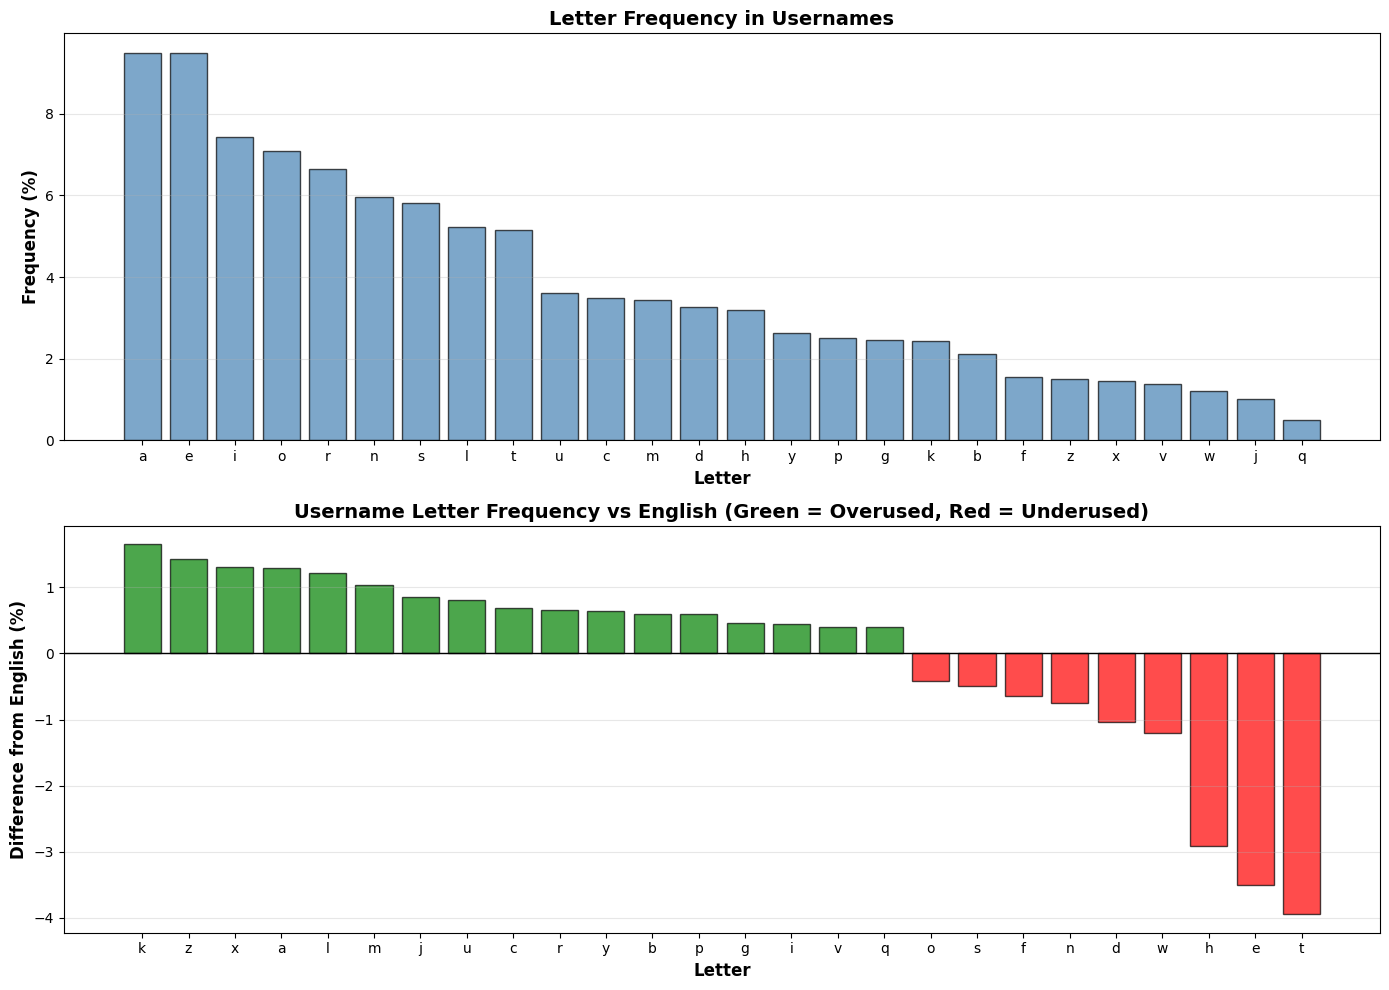

✓ Plot saved to plots/letter_frequency_analysis.png


In [7]:
# Plot letter frequency comparison
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Username letter frequency
sorted_username = freq_comparison.sort_values('username_freq', ascending=False)
ax1.bar(sorted_username['letter'], sorted_username['username_freq'], 
        color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Letter', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency (%)', fontsize=12, fontweight='bold')
ax1.set_title('Letter Frequency in Usernames', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Comparison: difference from English
freq_comparison['diff'] = freq_comparison['username_freq'] - freq_comparison['english_freq']
sorted_diff = freq_comparison.sort_values('diff', ascending=False)
colors = ['green' if x > 0 else 'red' for x in sorted_diff['diff']]
ax2.bar(sorted_diff['letter'], sorted_diff['diff'], color=colors, edgecolor='black', alpha=0.7)
ax2.axhline(0, color='black', linewidth=1)
ax2.set_xlabel('Letter', fontsize=12, fontweight='bold')
ax2.set_ylabel('Difference from English (%)', fontsize=12, fontweight='bold')
ax2.set_title('Username Letter Frequency vs English (Green = Overused, Red = Underused)', 
               fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(PLOTS_DIR / 'letter_frequency_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Plot saved to plots/letter_frequency_analysis.png")

## 4. N-Gram Analysis (2-grams and 3-grams)

In [8]:
def extract_ngrams(text, n):
    """Extract n-grams from text."""
    return [text[i:i+n] for i in range(len(text) - n + 1)]

# Extract bigrams (2-character combinations)
all_bigrams = []
for name in usernames:
    all_bigrams.extend(extract_ngrams(name.lower(), 2))

bigram_counts = Counter(all_bigrams)

print("TOP 20 BIGRAMS (2-CHARACTER COMBINATIONS)")
print("="*50)
for bigram, count in bigram_counts.most_common(20):
    print(f"  '{bigram}': {count:,} times")

TOP 20 BIGRAMS (2-CHARACTER COMBINATIONS)
  'er': 571 times
  'an': 518 times
  'in': 404 times
  'ar': 376 times
  'le': 337 times
  'on': 328 times
  're': 315 times
  'ra': 310 times
  'en': 307 times
  'ma': 296 times
  'al': 282 times
  'ro': 281 times
  'la': 279 times
  'st': 276 times
  'te': 274 times
  'ri': 270 times
  'ch': 248 times
  'es': 244 times
  'el': 241 times
  'at': 235 times


In [9]:
# Extract trigrams (3-character combinations)
all_trigrams = []
for name in usernames:
    all_trigrams.extend(extract_ngrams(name.lower(), 3))

trigram_counts = Counter(all_trigrams)

print("TOP 20 TRIGRAMS (3-CHARACTER COMBINATIONS)")
print("="*50)
for trigram, count in trigram_counts.most_common(20):
    print(f"  '{trigram}': {count:,} times")

TOP 20 TRIGRAMS (3-CHARACTER COMBINATIONS)
  'the': 95 times
  'ing': 86 times
  'ter': 76 times
  'and': 65 times
  'man': 57 times
  'der': 54 times
  'per': 54 times
  'ill': 53 times
  'min': 53 times
  'ito': 52 times
  'ste': 50 times
  'che': 49 times
  'ale': 48 times
  'cra': 48 times
  'ran': 48 times
  'ant': 47 times
  'ast': 47 times
  'ine': 46 times
  'ang': 46 times
  'chi': 46 times


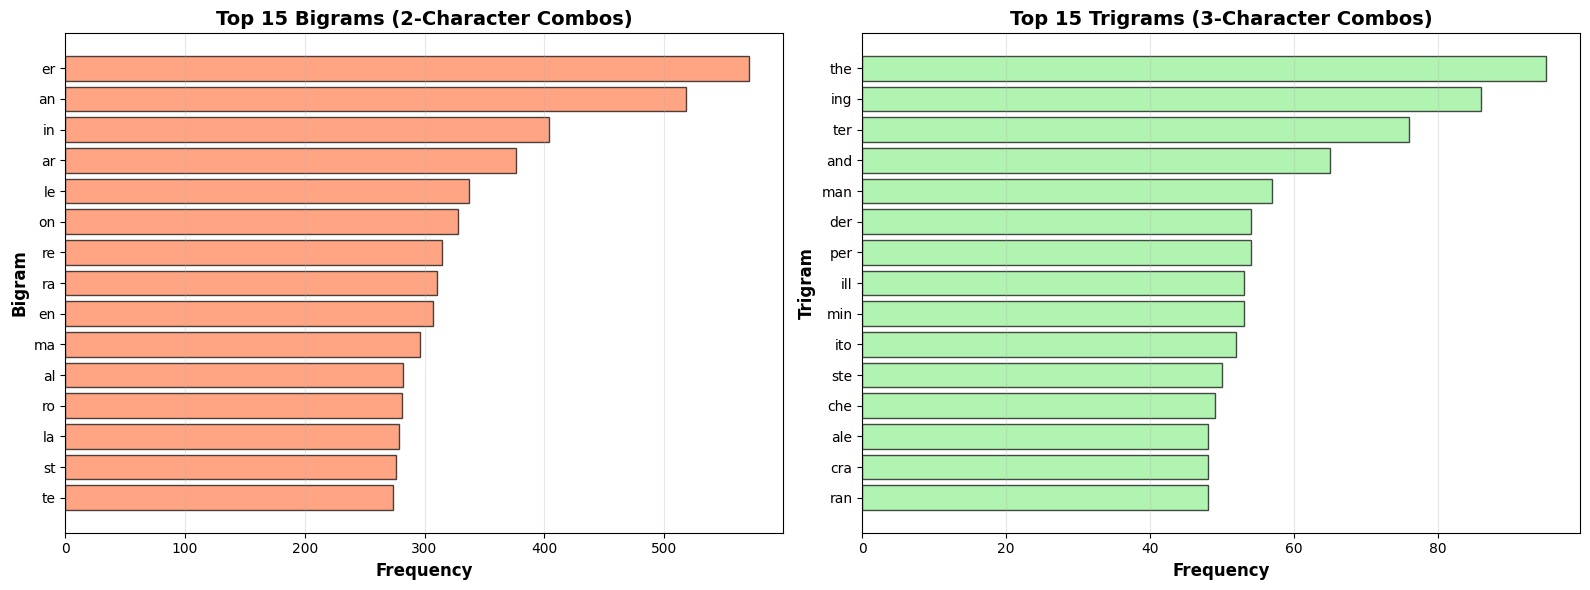

✓ Plot saved to plots/ngram_analysis.png


In [10]:
# Plot top n-grams
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top bigrams
top_bigrams = bigram_counts.most_common(15)
bg_labels = [x[0] for x in top_bigrams]
bg_counts = [x[1] for x in top_bigrams]
ax1.barh(bg_labels[::-1], bg_counts[::-1], color='coral', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_ylabel('Bigram', fontsize=12, fontweight='bold')
ax1.set_title('Top 15 Bigrams (2-Character Combos)', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Top trigrams
top_trigrams = trigram_counts.most_common(15)
tg_labels = [x[0] for x in top_trigrams]
tg_counts = [x[1] for x in top_trigrams]
ax2.barh(tg_labels[::-1], tg_counts[::-1], color='lightgreen', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_ylabel('Trigram', fontsize=12, fontweight='bold')
ax2.set_title('Top 15 Trigrams (3-Character Combos)', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig(PLOTS_DIR / 'ngram_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Plot saved to plots/ngram_analysis.png")

## 5. Case Pattern Analysis

In [11]:
# Categorize case patterns
def get_case_pattern(name):
    if name.islower():
        return 'lowercase'
    elif name.isupper():
        return 'UPPERCASE'
    elif name[0].isupper() and name[1:].islower():
        return 'Capitalized'
    elif any(c.isupper() for c in name[1:]) and any(c.islower() for c in name):
        return 'CamelCase/Mixed'
    else:
        return 'Other'

case_patterns = [get_case_pattern(name) for name in usernames if name.isalpha()]
case_counts = Counter(case_patterns)

print("CASE PATTERN DISTRIBUTION")
print("="*50)
for pattern, count in case_counts.most_common():
    pct = count / len(case_patterns) * 100
    print(f"{pattern:20} : {count:,} ({pct:.1f}%)")

CASE PATTERN DISTRIBUTION
Capitalized          : 1,354 (39.1%)
CamelCase/Mixed      : 1,041 (30.1%)
lowercase            : 970 (28.0%)
UPPERCASE            : 99 (2.9%)


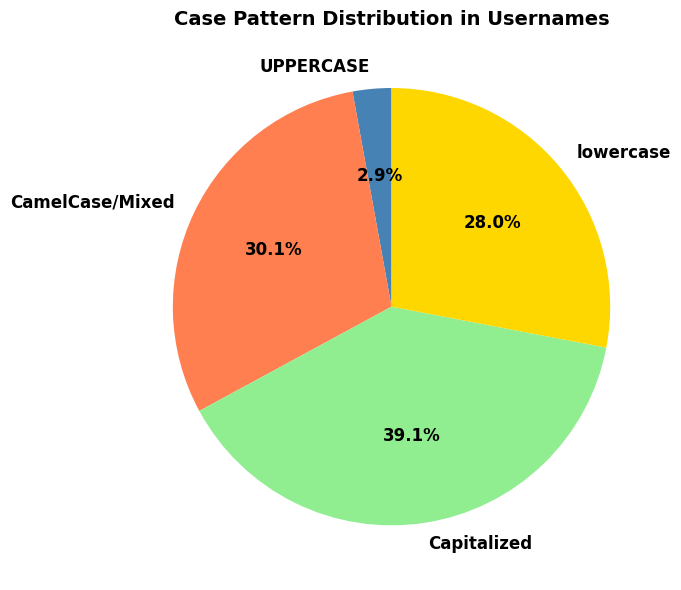

✓ Plot saved to plots/case_pattern_distribution.png


In [12]:
# Plot case patterns
plt.figure(figsize=(10, 6))
labels = list(case_counts.keys())
values = list(case_counts.values())
colors_pie = ['steelblue', 'coral', 'lightgreen', 'gold', 'plum']

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, 
        colors=colors_pie[:len(labels)], textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Case Pattern Distribution in Usernames', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(PLOTS_DIR / 'case_pattern_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Plot saved to plots/case_pattern_distribution.png")

## 6. Leet Speak Detection

In [13]:
# Common leet speak patterns
leet_patterns = {
    '0': 'o',
    '1': 'i/l',
    '3': 'e',
    '4': 'a',
    '5': 's',
    '7': 't',
    '8': 'b',
    '9': 'g'
}

# Count leet speak usage
leet_usage = Counter()
names_with_leet = 0

for name in usernames:
    has_leet = False
    for digit in leet_patterns.keys():
        if digit in name:
            leet_usage[digit] += name.count(digit)
            has_leet = True
    if has_leet:
        names_with_leet += 1

print("LEET SPEAK ANALYSIS")
print("="*50)
print(f"Usernames with leet speak: {names_with_leet:,} ({names_with_leet/len(usernames)*100:.1f}%)")
print(f"\nMost common leet substitutions:")
for digit, count in leet_usage.most_common():
    letter = leet_patterns[digit]
    print(f"  '{digit}' (for {letter}): {count:,} times")

LEET SPEAK ANALYSIS
Usernames with leet speak: 949 (18.9%)

Most common leet substitutions:
  '1' (for i/l): 393 times
  '0' (for o): 365 times
  '3' (for e): 261 times
  '4' (for a): 195 times
  '9' (for g): 193 times
  '7' (for t): 186 times
  '5' (for s): 132 times
  '8' (for b): 123 times


## 7. Prefix/Suffix Analysis

In [14]:
# Extract common prefixes (first 2-3 characters)
prefixes_2 = Counter([name[:2].lower() for name in usernames if len(name) >= 2])
prefixes_3 = Counter([name[:3].lower() for name in usernames if len(name) >= 3])

# Extract common suffixes (last 2-3 characters)
suffixes_2 = Counter([name[-2:].lower() for name in usernames if len(name) >= 2])
suffixes_3 = Counter([name[-3:].lower() for name in usernames if len(name) >= 3])

print("PREFIX ANALYSIS")
print("="*50)
print("\nTop 10 2-character prefixes:")
for prefix, count in prefixes_2.most_common(10):
    print(f"  '{prefix}': {count:,} names")

print("\nTop 10 3-character prefixes:")
for prefix, count in prefixes_3.most_common(10):
    print(f"  '{prefix}': {count:,} names")

print("\n" + "="*50)
print("SUFFIX ANALYSIS")
print("="*50)
print("\nTop 10 2-character suffixes:")
for suffix, count in suffixes_2.most_common(10):
    print(f"  '{suffix}': {count:,} names")

print("\nTop 10 3-character suffixes:")
for suffix, count in suffixes_3.most_common(10):
    print(f"  '{suffix}': {count:,} names")

PREFIX ANALYSIS

Top 10 2-character prefixes:
  'ma': 102 names
  'ca': 72 names
  'ch': 65 names
  'al': 61 names
  'da': 61 names
  'sa': 58 names
  'th': 58 names
  'st': 53 names
  'mi': 52 names
  'co': 50 names

Top 10 3-character prefixes:
  'the': 46 names
  'ale': 23 names
  'mat': 21 names
  'cha': 19 names
  'nic': 18 names
  'bla': 16 names
  'chi': 16 names
  'min': 16 names
  'str': 16 names
  'car': 15 names

SUFFIX ANALYSIS

Top 10 2-character suffixes:
  'er': 140 names
  'on': 77 names
  'an': 76 names
  'es': 53 names
  'ne': 52 names
  'en': 47 names
  'ed': 45 names
  'us': 44 names
  'ss': 41 names
  'ng': 40 names

Top 10 3-character suffixes:
  'ter': 25 names
  'ing': 25 names
  'ito': 20 names
  'man': 18 names
  'one': 18 names
  'ion': 17 names
  'ine': 15 names
  'ver': 13 names
  '123': 13 names
  'eee': 13 names


## 8. Number Usage Patterns

In [15]:
# Analyze number usage
names_with_numbers = [name for name in usernames if any(c.isdigit() for c in name)]
names_without_numbers = [name for name in usernames if not any(c.isdigit() for c in name)]

# Extract all numbers
all_numbers = []
for name in usernames:
    numbers = re.findall(r'\d+', name)
    all_numbers.extend(numbers)

number_counts = Counter(all_numbers)

print("NUMBER USAGE ANALYSIS")
print("="*50)
print(f"Usernames with numbers: {len(names_with_numbers):,} ({len(names_with_numbers)/len(usernames)*100:.1f}%)")
print(f"Usernames without numbers: {len(names_without_numbers):,} ({len(names_without_numbers)/len(usernames)*100:.1f}%)")

print(f"\nTop 20 most common numbers in usernames:")
for num, count in number_counts.most_common(20):
    print(f"  {num}: {count:,} times")

NUMBER USAGE ANALYSIS
Usernames with numbers: 1,009 (20.1%)
Usernames without numbers: 4,017 (79.9%)

Top 20 most common numbers in usernames:
  0: 109 times
  1: 98 times
  3: 69 times
  4: 52 times
  2: 42 times
  7: 33 times
  9: 21 times
  6: 19 times
  5: 17 times
  99: 15 times
  8: 14 times
  10: 13 times
  17: 12 times
  123: 12 times
  00: 10 times
  11: 9 times
  69: 9 times
  14: 8 times
  27: 8 times
  28: 8 times


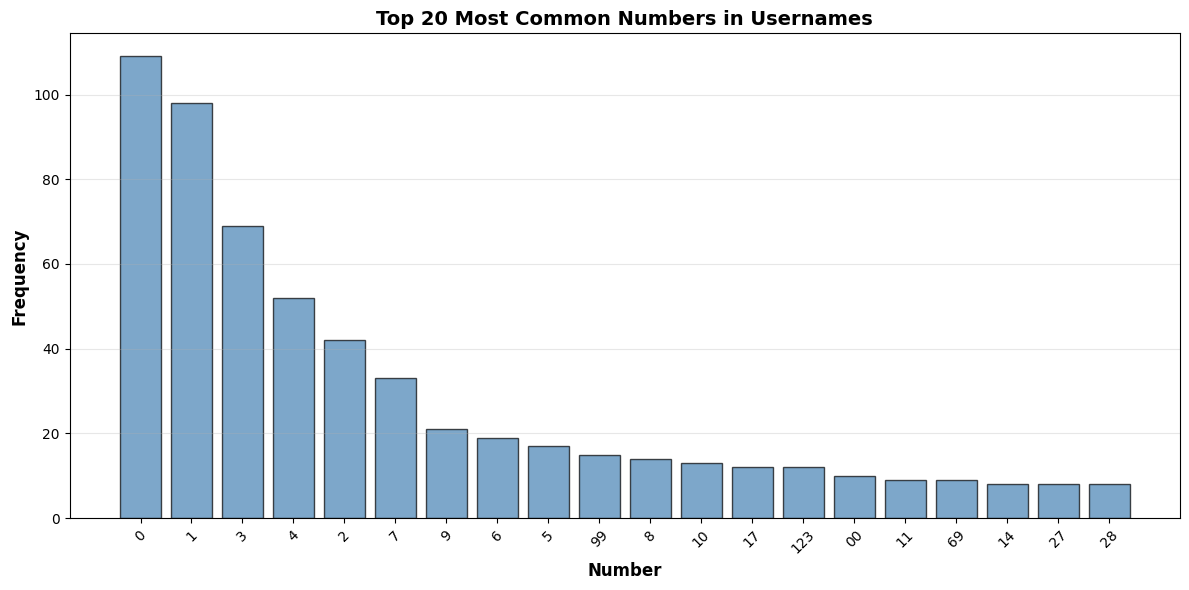

✓ Plot saved to plots/number_usage_analysis.png


In [16]:
# Plot number usage
plt.figure(figsize=(12, 6))
top_numbers = number_counts.most_common(20)
num_labels = [x[0] for x in top_numbers]
num_counts = [x[1] for x in top_numbers]

plt.bar(num_labels, num_counts, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Number', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 20 Most Common Numbers in Usernames', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(PLOTS_DIR / 'number_usage_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Plot saved to plots/number_usage_analysis.png")

## 9. Summary Report

In [17]:
print("\n" + "="*80)
print("USERNAME LINGUISTICS - SUMMARY REPORT")
print("="*80)

print(f"\n📊 DATASET")
print(f"  Total unique usernames: {len(usernames):,}")
print(f"  Average length: {np.mean(lengths):.1f} characters")
print(f"  Length range: {min(lengths)} - {max(lengths)} characters")

print(f"\n🔤 CHARACTER COMPOSITION")
print(f"  Letters: {sum(letters.values())/len(all_chars)*100:.1f}%")
print(f"  Digits: {sum(digits.values())/len(all_chars)*100:.1f}%")
print(f"  Special chars: {sum(special.values())/len(all_chars)*100:.1f}%")

print(f"\n🎯 KEY FINDINGS")
print(f"  Most overused letter vs English: {sorted_diff.iloc[0]['letter'].upper()} (+{sorted_diff.iloc[0]['diff']:.1f}%)")
print(f"  Most underused letter vs English: {sorted_diff.iloc[-1]['letter'].upper()} ({sorted_diff.iloc[-1]['diff']:.1f}%)")
print(f"  Most common bigram: '{bigram_counts.most_common(1)[0][0]}'")
print(f"  Most common trigram: '{trigram_counts.most_common(1)[0][0]}'")
print(f"  Most popular number: {number_counts.most_common(1)[0][0]}")
print(f"  Leet speak usage: {names_with_leet/len(usernames)*100:.1f}% of usernames")

print(f"\n💾 OUTPUTS")
print(f"  All plots saved to: {PLOTS_DIR}/")

print("\n" + "="*80)
print("✓ ANALYSIS COMPLETE!")
print("="*80)


USERNAME LINGUISTICS - SUMMARY REPORT

📊 DATASET
  Total unique usernames: 5,026
  Average length: 8.3 characters
  Length range: 1 - 16 characters

🔤 CHARACTER COMPOSITION
  Letters: 92.5%
  Digits: 5.5%
  Special chars: 2.1%

🎯 KEY FINDINGS
  Most overused letter vs English: K (+1.7%)
  Most underused letter vs English: T (-3.9%)
  Most common bigram: 'er'
  Most common trigram: 'the'
  Most popular number: 0
  Leet speak usage: 18.9% of usernames

💾 OUTPUTS
  All plots saved to: ..\plots/

✓ ANALYSIS COMPLETE!
